<a href="https://colab.research.google.com/github/Durand-LeQuang-Vialfont/banksdefault/blob/main/banks_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab => \n Clonining repo with git (if not already done) \n Heading execution to: /content/banksdefault/')
    !git clone https://github.com/Durand-LeQuang-Vialfont/banksdefault /content/banksdefault
    %cd /content/banksdefault/
    from google.colab import files
    !pip install -r requirements_colab.txt
    # For a stricter environment installation use the following instead (session restart needed) :
    # !pip install -r requirements_extended.txt

else:
    import os
    import sys
    print(f'Not running on Colab => \n Executing code from folder: {os.getcwd()}.\n Interpreter at {sys.prefix}.')

Running on Colab => 
 Clonining repo with git (if not already done) 
 Heading execution to: /content/banksdefault/
Cloning into '/content/banksdefault'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 25 (delta 1), reused 19 (delta 1), pack-reused 0
Receiving objects: 100% (25/25), 12.80 MiB | 9.32 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/banksdefault
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.8 MB/s eta 0:00:00


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Import-synthetic-data" data-toc-modified-id="Import-synthetic-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import synthetic data</a></span></li><li><span><a href="#SMOTE-procedure" data-toc-modified-id="SMOTE-procedure-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SMOTE procedure</a></span></li><li><span><a href="#choix-du-modele" data-toc-modified-id="choix-du-modele-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>choix du modele</a></span></li><li><span><a href="#hyperparam" data-toc-modified-id="hyperparam-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>hyperparam</a></span><ul class="toc-item"><li><span><a href="#Search" data-toc-modified-id="Search-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Search</a></span></li><li><span><a href="#Hyperparam-and-scores" data-toc-modified-id="Hyperparam-and-scores-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Hyperparam and scores</a></span></li><li><span><a href="#Optimal-hyperparams" data-toc-modified-id="Optimal-hyperparams-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Optimal hyperparams</a></span></li></ul></li><li><span><a href="#Results-and-interpretation" data-toc-modified-id="Results-and-interpretation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results and interpretation</a></span><ul class="toc-item"><li><span><a href="#cells-to-delete" data-toc-modified-id="cells-to-delete-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>cells to delete</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Fitting the model</a></span></li><li><span><a href="#Model's-performances" data-toc-modified-id="Model's-performances-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Model's performances</a></span></li><li><span><a href="#Descriptive-statistics-on-results" data-toc-modified-id="Descriptive-statistics-on-results-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Descriptive statistics on results</a></span><ul class="toc-item"><li><span><a href="#Probability-distribution" data-toc-modified-id="Probability-distribution-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Probability distribution</a></span></li></ul></li><li><span><a href="#FEATURES-IMPORTANCE" data-toc-modified-id="FEATURES-IMPORTANCE-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>FEATURES IMPORTANCE</a></span><ul class="toc-item"><li><span><a href="#Shapley's-value" data-toc-modified-id="Shapley's-value-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Shapley's value</a></span></li><li><span><a href="#Permutation-importance" data-toc-modified-id="Permutation-importance-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Permutation importance</a></span></li></ul></li><li><span><a href="#PARTIAL-DEPENDENCE-PLOT" data-toc-modified-id="PARTIAL-DEPENDENCE-PLOT-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>PARTIAL DEPENDENCE PLOT</a></span><ul class="toc-item"><li><span><a href="#One-Way-PDP" data-toc-modified-id="One-Way-PDP-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>One-Way PDP</a></span></li></ul></li><li><span><a href="#ACCUMULATED-LOCAL-EFFECT" data-toc-modified-id="ACCUMULATED-LOCAL-EFFECT-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>ACCUMULATED LOCAL EFFECT</a></span></li></ul></li></ul></div>

# Packages

In [2]:
import os
import sys
import datetime
import itertools
import pandas as pd
import numpy as np
import re
import joblib
import copy
import pickle as pkl

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Graphiques
import matplotlib                              #Plots
from matplotlib import cm                      #Colormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.gridspec as gridspec         #Subplot in subplot
from matplotlib.ticker import MaxNLocator      #Force x-axis to be intger
import seaborn as sns
# setting graphs
plt.rcParams["figure.figsize"] = (16, 9)
sns.set_style("darkgrid")

# Classifieurs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

# Pipelines et GridSearch
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_Pipeline
from sklearn.model_selection import GridSearchCV

# Interpretation
from mpl_toolkits.mplot3d import Axes3D
import shap
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from PyALE import ale

# Using defined functions
from functions.interpretation import permutation_importance
from functions.training import write_grid_search_results

DATA_PATH = "./data/"
OUTPUT_PATH = './output/'
METRICS = ['recall', 'recall_macro','f1','f1_macro','accuracy','precision','roc_auc',]
RANDOM_SEED=42
TEST = 0.95
FOLDS = 2

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



# Import synthetic data

In [3]:
"""import data - define variables lists
    - df (pd.DataFrame): dataframe containing synthetic data"""

df = pd.read_csv(DATA_PATH + "synthetic_data.txt", sep=";")
df.head()

,ID,ID per year,Year,Dum_Default,Total equity total assets,Total reg cap ratio,Liquid assets total assets,Deposits mm funding growth,Expenses rev,Net int margin,...,Total desposits over TA,Total funding over TA,Total int exp over TA,Total non earning assets over TA,Total oper expense over TA,log_Avg earning assets over TA,log_Bus volume over TA,log_Liquid assets deposits mm funding,log_Total assets,log_Total non int exp over TA
0,13215466,132154662014,2014,0,14.910683,18.282517,3.077498,1616.302825,56.023078,3.710629,...,0.748982,0.843036,0.005267,0.053191,0.021550,0.655417,0.885554,1.545851,19.147727,0.021309
1,21776652,217766522002,2002,0,13.900000,19.100000,5.600000,60.000000,67.500000,6.200000,...,0.793035,0.853847,0.016136,0.083840,0.046643,0.632886,0.699220,2.028148,17.714084,0.043261
2,24093640,240936402012,2012,0,9.279741,14.820007,6.387157,-50.020364,53.888990,4.249898,...,0.926687,0.903881,0.011488,0.046269,0.028845,0.672941,0.737107,2.075824,20.234173,0.024169
3,18010425,180104252005,2005,0,10.020848,12.377526,4.335830,-37.427293,70.134845,3.835830,...,0.832834,0.886627,0.026549,0.043199,0.030108,0.655749,0.763967,1.831046,20.114460,0.028086
4,3606768,36067682009,2009,0,9.466163,21.222226,5.923254,146.421381,98.272408,3.207873,...,0.897742,0.902142,0.009643,0.080690,0.033943,0.656493,0.710758,1.640366,18.597079,0.033156


In [4]:
# identification columns
l_id = ['ID', 'Year', 'ID per year']

# features columns
l_var = list(df)[4:]

# SMOTE procedure

In [5]:
# defining features and labels matrices
X = df[l_var]
y = df["Dum_Default"]

# splitting into trainnig and testing samples
X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=TEST,random_state=RANDOM_SEED)


# applying SMOTE procedure on training data
smote = SMOTE(random_state=RANDOM_SEED)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Defaults before smote: ', Counter(y_train))
print('Default after smote: ', Counter(y_train_smote))

Defaults before smote:  Counter({0: 2957, 1: 28})
Default after smote:  Counter({0: 2957, 1: 2957})


# choix du modele

In [ ]:
# choisissez un modele :
    # rf : random forest
    # gbc : gradient
    # ...

algo = "rf"

# hyperparam

In [ ]:
d = {"rf":["split"], "gbc":["iter"]}

d[algo]

['split']

In [ ]:
# hypermarametrage d'un model

In [ ]:
##########
# OUTPUT #
##########

# liste des hyperparam en valeur
    # d_optimal_param

## Search

In [6]:
dict_params_rndf = [
    {
    'standardize' : [None,StandardScaler(),],# None,StandardScaler(),RobustScaler()],
    'model' : [RandomForestClassifier(random_state=RANDOM_SEED)],
    #'model__max_depth' : [None, 5,10,50],
    #'model__n_estimators' : [5,10,50,100,500,1000], # Nb of trees
    #'model__max_features' : [None,'sqrt','log2', 5, 10],
    'model__min_samples_split' : [20,],# 5, 10, 20],
    },

]

In [7]:
pipe = imb_Pipeline([
        ('standardize', None),
        ('sampling', SMOTE(random_state=RANDOM_SEED)),
        ('model', None),
    ])

In [8]:
param_dicts = [
    #dict_params_logistic,
    #dict_params_knn,
    #dict_params_svm,
    dict_params_rndf,
    #dict_params_gradient_boosting,
    #dict_params_histo_grad_boosting,
]

In [9]:
for num, param_dict in enumerate(param_dicts):
    print('\n_________________________________\n_________________________________\n',
      '\n Training : {}'.format(str(param_dicts[num][0]['model'][0]).split('(')[0]),
      '\n_________________________________\n_________________________________\n',)
    start=datetime.datetime.now()
    imb_grid_search = GridSearchCV (
                            pipe
                            , cv = FOLDS
                            , n_jobs = 60 # no more than 63 in sklearn, -1 for all available
                            , param_grid =  param_dict
                            , verbose = 24
                            , scoring = METRICS
                            , refit = METRICS[0]
                            , return_train_score = True
                    )

    imb_grid_search.fit(X_train, y_train)

    end=datetime.datetime.now()

    delta=end-start

    training_time=str(delta).replace(' ','').replace(',','_').replace(':','_').split('.')[0]

    print('\nTime for training =', training_time,'\n')

    df_cv_smote=pd.DataFrame(imb_grid_search.cv_results_)

    now=datetime.datetime.now().strftime("%Y-%m-%d__%H_%M_%S")

    model_type = ''.join(letter for letter in str(df_cv_smote['param_model'][0]).split('(')[0] if letter.isupper())

    output_name = model_type + '_train-time='+ training_time + '_date='+ now

    joblib.dump(imb_grid_search, OUTPUT_PATH + output_name  + '_grid_search' + '.pkl')

    write_grid_search_results(imb_grid_search, message = 'Initial, small training set', metrics=METRICS, nb_folds = FOLDS,
                          file_out= OUTPUT_PATH + output_name + '_grid_search-results' + '.xlsx')


_________________________________
_________________________________
 
 Training : RandomForestClassifier 
_________________________________
_________________________________

Fitting 2 folds for each of 2 candidates, totalling 4 fits



2 fits failed out of a total of 4.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "/usr


Time for training = 0_00_21 



All-NaN slice encountered
All-NaN slice encountered


Modèles avec un problème lors de la grid search
   id                   model param_standardize min_samples_split
0   1  RandomForestClassifier              None                20
1   2  RandomForestClassifier  StandardScaler()                20

Meilleurs paramètres par modèle
   rank_valid_recall  mean_valid_recall  mean_valid_recall_macro  \
0                  1                NaN                      NaN   

   mean_valid_f1  mean_valid_f1_macro  mean_valid_accuracy  \
0            NaN                  NaN                  NaN   

   mean_valid_precision  mean_valid_roc_auc  mean_fit_time  \
0                   NaN                 NaN       0.558363   

                    model param_standardize min_samples_split  
0  RandomForestClassifier              None                20  

10 meilleurs modèles
   rank_valid_recall                   model param_standardize  \
0                  1  RandomForestClassifier              None   
1                  1  RandomForestClassifier  Standa

## Hyperparam and scores

In [10]:
tables=[file for file in os.listdir(OUTPUT_PATH) if file.endswith("results.xlsx")]
print(len(tables))
tables

2


['RFC_train-time=0_00_21_date=2024-04-02__14_33_21_grid_search-results.xlsx',
 'RFC_train-time=0_02_03_date=2024-02-24__13_09_58_grid_search-results.xlsx']

In [11]:
df_info = pd.DataFrame()
for table in tables:
    df_temp=pd.read_excel(OUTPUT_PATH+table)
    #df_temp['refit']=table.split('refit=')[1].split('_T')[0]
    df_info=pd.concat([df_info, df_temp], ignore_index=True, sort=False)
df_info['N']=1
df_info

,message,rank_valid_recall,model,param_standardize,min_samples_split,mean_valid_recall,mean_valid_recall_macro,mean_valid_f1,mean_valid_f1_macro,mean_valid_accuracy,...,split1_train_f1_macro,split1_valid_accuracy,split1_train_accuracy,split1_valid_precision,split1_train_precision,split1_valid_roc_auc,split1_train_roc_auc,param_model,id,N
0,"Initial, small training set",1,RandomForestClassifier,NaN,20,NaN,NaN,NaN,NaN,NaN,...,1.0000,0.9913,1.0000,0.2778,1.0000,0.9972,1,"RandomForestClassifier(min_samples_split=20, r...",1,1
1,"Initial, small training set",1,RandomForestClassifier,StandardScaler(),20,NaN,NaN,NaN,NaN,NaN,...,1.0000,0.9913,1.0000,0.2778,1.0000,0.9973,1,"RandomForestClassifier(min_samples_split=20, r...",2,1
2,"Initial, small training set",1,RandomForestClassifier,NaN,20,0.8022,0.8984,0.6519,0.8241,0.9928,...,0.9727,0.9926,0.9990,0.5394,0.8974,0.9889,1,"RandomForestClassifier(min_samples_split=20, r...",1,1
3,"Initial, small training set",2,RandomForestClassifier,StandardScaler(),20,0.7765,0.8861,0.6817,0.8393,0.9939,...,0.9806,0.9932,0.9993,0.5684,0.9259,0.9812,1,"RandomForestClassifier(min_samples_split=20, r...",2,1


In [12]:
models_list=set(df_info['model'].values)
print(len(models_list))
models_list

1


{'RandomForestClassifier'}

In [13]:
scores_list=[col for col in list(df_info.columns) if col.startswith(('mean','std'))]
print(scores_list)

['mean_valid_recall', 'mean_valid_recall_macro', 'mean_valid_f1', 'mean_valid_f1_macro', 'mean_valid_accuracy', 'mean_valid_precision', 'mean_valid_roc_auc', 'mean_train_recall', 'mean_train_recall_macro', 'mean_train_f1', 'mean_train_f1_macro', 'mean_train_accuracy', 'mean_train_precision', 'mean_train_roc_auc', 'std_valid_recall', 'std_valid_recall_macro', 'std_valid_f1', 'std_valid_f1_macro', 'std_valid_accuracy', 'std_valid_precision', 'std_valid_roc_auc', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'std_train_recall', 'std_train_recall_macro', 'std_train_f1', 'std_train_f1_macro', 'std_train_accuracy', 'std_train_precision', 'std_train_roc_auc']


In [14]:
temp_list=[x for x in list(df_info.columns) if x.startswith(('rank', 'id', 'param_model','message', 'model','param_standardize','N'))] #,'refit'
#print(temp_list)

In [15]:
params_list=[x for x in list(df_info.columns) if x not in scores_list + temp_list and not x.startswith('split')]
#print(params_list)

In [16]:
subdf=df_info[['model','param_standardize','N']+params_list+scores_list]
#['model','param_standardize','N'] pour afficher par standardisation..
subdf['param_standardize']=subdf['param_standardize'].fillna(value='None')
subdf


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,model,param_standardize,N,min_samples_split,mean_valid_recall,mean_valid_recall_macro,mean_valid_f1,mean_valid_f1_macro,mean_valid_accuracy,mean_valid_precision,...,std_fit_time,mean_score_time,std_score_time,std_train_recall,std_train_recall_macro,std_train_f1,std_train_f1_macro,std_train_accuracy,std_train_precision,std_train_roc_auc
0,RandomForestClassifier,None,1,20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5519,0.0412,0.0412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RandomForestClassifier,StandardScaler(),1,20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6259,0.0355,0.0355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RandomForestClassifier,None,1,20,0.8022,0.8984,0.6519,0.8241,0.9928,0.5490,...,0.5585,0.3360,0.0090,0.0,0.0000,0.0027,0.0014,0.0000,0.0048,0.0
3,RandomForestClassifier,StandardScaler(),1,20,0.7765,0.8861,0.6817,0.8393,0.9939,0.6081,...,0.4140,0.3570,0.0150,0.0,0.0001,0.0108,0.0054,0.0002,0.0204,0.0


In [17]:
aggfunc={x : np.mean for x in scores_list} #[np.mean,np.std,min,max]
aggfunc['N']='count'

In [18]:
order=['N','mean_fit_time','mean_score_time',
       'mean_train_recall', 'mean_valid_recall',
       'mean_train_recall_macro', 'mean_valid_recall_macro',
       'mean_train_f1', 'mean_valid_f1',
       'mean_train_f1_macro', 'mean_valid_f1_macro',
       'mean_train_accuracy', 'mean_valid_accuracy',
       'mean_train_precision', 'mean_valid_precision',
       'mean_train_roc_auc', 'mean_valid_roc_auc',
       'std_fit_time', 'std_score_time',
       'std_train_recall', 'std_valid_recall',
       'std_train_recall_macro', 'std_valid_recall_macro',
       'std_train_f1', 'std_valid_f1',
       'std_train_f1_macro', 'std_valid_f1_macro',
       'std_train_accuracy', 'std_valid_accuracy',
       'std_train_precision', 'std_valid_precision',
       'std_train_roc_auc','std_valid_roc_auc',
      ]

In [19]:
hour = datetime.datetime.now().strftime("%Y-%m-%d__%H_%M_%S")
writer = pd.ExcelWriter(OUTPUT_PATH+'sum-up_'+hour+'.xlsx', engine='openpyxl')
for model in models_list:
    n=0
    for param in params_list:
        pivot=pd.pivot_table(subdf.loc[subdf['model'] == model],
                             index=['param_standardize',param], #['param_standardize',param] ['refit',param]
                             values=['N']+scores_list,
                             aggfunc=aggfunc).reindex(order, axis=1)

        if pivot.shape[0]>0:
            display(n,model,param,pivot)
            pivot.style.set_properties(**{"text-align": "center", "vertical-align": "middle"})\
            .background_gradient(subset=['mean_valid_' + METRICS[0]], cmap='BuGn')\
            .to_excel(writer, startrow=n, float_format="%.4f",sheet_name = model)
            writer.close()
            n+=pivot.shape[0]+5

0

'RandomForestClassifier'

'min_samples_split'

,,N,mean_fit_time,mean_score_time,mean_train_recall,mean_valid_recall,mean_train_recall_macro,mean_valid_recall_macro,mean_train_f1,mean_valid_f1,mean_train_f1_macro,...,std_train_f1,std_valid_f1,std_train_f1_macro,std_valid_f1_macro,std_train_accuracy,std_valid_accuracy,std_train_precision,std_valid_precision,std_train_roc_auc,std_valid_roc_auc
param_standardize,min_samples_split,,,,,,,,,,,,,,,,,,,,,
None,20,2,18.97405,0.18860,1.0,0.8022,0.9995,0.8984,0.9432,0.6519,0.9714,...,0.0027,0.0117,0.0014,0.0059,0.0000,0.0002,0.0048,0.0096,0.0,0.0049
StandardScaler(),20,2,19.11125,0.19625,1.0,0.7765,0.9998,0.8861,0.9723,0.6817,0.9860,...,0.0108,0.0297,0.0054,0.0150,0.0002,0.0007,0.0204,0.0398,0.0,0.0006


## Optimal hyperparams

In [20]:
grids_search=[file for file in os.listdir(OUTPUT_PATH) if file.endswith("grid_search.pkl")]
print(len(grids_search))
grids_search

1


['RFC_train-time=0_00_21_date=2024-04-02__14_33_21_grid_search.pkl']

In [21]:
df_gs_scores = pd.DataFrame()
for grid in grids_search:
    gs=joblib.load(OUTPUT_PATH+grid)
    df_temp_gs=pd.DataFrame(gs.cv_results_)
    #df_temp_gs['refit']=grid.split('refit=')[1].split('.')[0]
    df_gs_scores=pd.concat([df_gs_scores, df_temp_gs], ignore_index=True, sort=False)
df_gs_scores['model']= df_gs_scores['params'].apply(lambda x: str(x['model']).split('(')[0])
df_gs_scores[['params','param_standardize','mean_test_'+METRICS[0],]]

,params,param_standardize,mean_test_recall
0,{'model': RandomForestClassifier(min_samples_s...,None,NaN
1,{'model': RandomForestClassifier(min_samples_s...,StandardScaler(),NaN


In [22]:
score='mean_test_'+METRICS[0]
score

'mean_test_recall'

In [23]:
for metric in METRICS[:4]:
    score='mean_test_'+metric
    represent=df_gs_scores.sort_values(score).groupby('model').tail(1)
    #display(represent[['params',score]])
    repr_scores=zip(represent['params'].to_list(), represent[score].to_list())
    estimators=list()
    n=0
    for hyper in repr_scores:

        est = str(hyper[0]['model'])

        hyper_skl={k.split('__')[1]: v for k, v in hyper[0].items() if k not in ('model','standardize')}

        estimators.append((hyper[0]['model'].set_params(**hyper_skl), 'STAND = ' + str(hyper[0]['standardize']), hyper[1]))

        n+=1
    print(metric, ' :')
    print(estimators,'\n\n')

recall  :
[(RandomForestClassifier(min_samples_split=20, random_state=42), 'STAND = StandardScaler()', nan)] 


recall_macro  :
[(RandomForestClassifier(min_samples_split=20, random_state=42), 'STAND = StandardScaler()', nan)] 


f1  :
[(RandomForestClassifier(min_samples_split=20, random_state=42), 'STAND = StandardScaler()', nan)] 


f1_macro  :
[(RandomForestClassifier(min_samples_split=20, random_state=42), 'STAND = StandardScaler()', nan)] 




# Results and interpretation


## Fitting the model

In [24]:
scaler = None # None, StandardScaler(), RobustScaler()
if scaler:
    X_train_results, X_test_results = scaler.transform(X_train_smote), scaler.transform(X_test)
else:
    X_train_results, X_test_results = X_train_smote, X_test

In [25]:
# fitting the model
model = RandomForestClassifier(max_depth=5, max_features=5, min_samples_split=5,
                               random_state=RANDOM_SEED)

model.fit(X_train_results, y_train_smote)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_split=5,
                       random_state=42)

## Model's performances

- Performances are computed using the un-SMOTE samples: test samples
- Therefore, it gives us the model's performance on samples that the model never have seen

In [26]:
"""confusion matrix - accuracy in sample
    - y_predict_in (np.ndarray): predicted values by the model for training set
    - cross_tab_in (np.ndarray): confusion matrix for training set"""

y_predict_in = model.predict(X_train_results)

cross_tab_in = pd.crosstab(y_train_smote,y_predict_in).values

a = cross_tab_in[0,0] # true positives
b = cross_tab_in[0,1] # false positives
c = cross_tab_in[1,0] # false negatives
d = cross_tab_in[1,1] # true negatives

print(f'Global accuracy: {accuracy_score(y_train_smote,y_predict_in)}')
print(f'In-sample good classification for non default (recall for 0): {round(a/(a+b)*100,2)} %')
print(f'In-sample good classification for default (recall for 1): {round(d/(c+d)*100,2)} %')


pd.crosstab(y_train_smote,y_predict_in)

Global accuracy: 0.9956036523503551
In-sample good classification for non default (recall for 0): 99.26 %
In-sample good classification for default (recall for 1): 99.86 %


col_0,0,1
Dum_Default,,
0,2935,22
1,4,2953


In [27]:
"""confusion matrix - accuracy out sample
    - y_predict_out (np.ndarray): predicted values by the model for test set
    - cross_tab_out (np.ndarray): confusion matrix for test set"""

y_predict_out = model.predict(X_test_results)

cross_tab_out = pd.crosstab(y_test,y_predict_out).values

a = cross_tab_out[0,0] # true positives
b = cross_tab_out[0,1] # false positives
c = cross_tab_out[1,0] # false negatives
d = cross_tab_out[1,1] # true negatives

print(f'Global accuracy: {accuracy_score(y_test,y_predict_out)}')
print(f'Out-sample good classification for non default (recall for 0): {round(a/(a+b)*100,2)} %')
print(f'Out-sample good classification for default (recall for 1): {round(d/(c+d)*100,2)} %')

pd.crosstab(y_test,y_predict_out)

Global accuracy: 0.9881886293521375
Out-sample good classification for non default (recall for 0): 98.96 %
Out-sample good classification for default (recall for 1): 81.78 %


col_0,0,1
Dum_Default,,
0,55669,584
1,86,386


In [28]:
# Classif test set
y_pred = model.predict(X_test_results)
print("Classification report on the test set:\n\n",classification_report(y_test, y_predict_out))

Classification report on the test set:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56253
           1       0.40      0.82      0.54       472

    accuracy                           0.99     56725
   macro avg       0.70      0.90      0.76     56725
weighted avg       0.99      0.99      0.99     56725



In [29]:
# ROC - AUC (on test samples)

fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test_results)[:,1])
roc_auc = auc(fpr, tpr)

print(f"The ROC-AUC is: {roc_auc}")

The ROC-AUC is: 0.9701009354830643


In [30]:
# PR - AUC (on test samples)

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_results)[:,1])
pr_auc = auc(recall, precision)

print(f"The PR-AUC is: {pr_auc}")

The PR-AUC is: 0.669090479201708


## Descriptive statistics on results


### Probability distribution

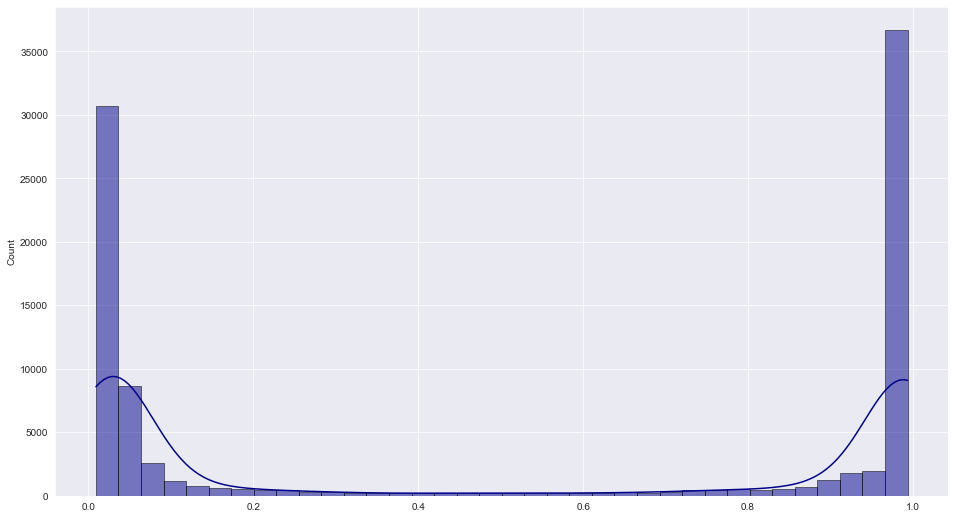

In [ ]:
# probabilities distribution: all

ar_prob = model.predict_proba(X_train_results)[:,1]

sns.histplot(ar_prob, kde=True, bins=int(180/5), color = 'darkblue',ec="black",linewidth=0.5)



plt.show()

In [ ]:
# retreiving predicted probabilities in the train sample
    # mean running time: 30'



# d_prob_dis
d_prob_dis = {"TN":[], "FP":[], "FN":[], "TP":[]}


for index in X_train_results.index :
    pred = model.predict(X_train_results.loc[[index]])[0]
    true = y_train_smote.loc[index]

    prob = model.predict_proba(X_train_results.loc[[index]])[0,1]


    if pred - true == 0 :
        if true == 1 :
            d_prob_dis["TP"].append(prob)
        else :
            d_prob_dis["TN"].append(prob)
    elif pred - true == -1 :
        d_prob_dis["FN"].append(prob)
    else :
        d_prob_dis["FP"].append(prob)


# for saving as pkl file
# with open('../robustness/d_prob_dis_rf.pkl', 'wb') as fp:
#     pkl.dump(d_prob_dis, fp)

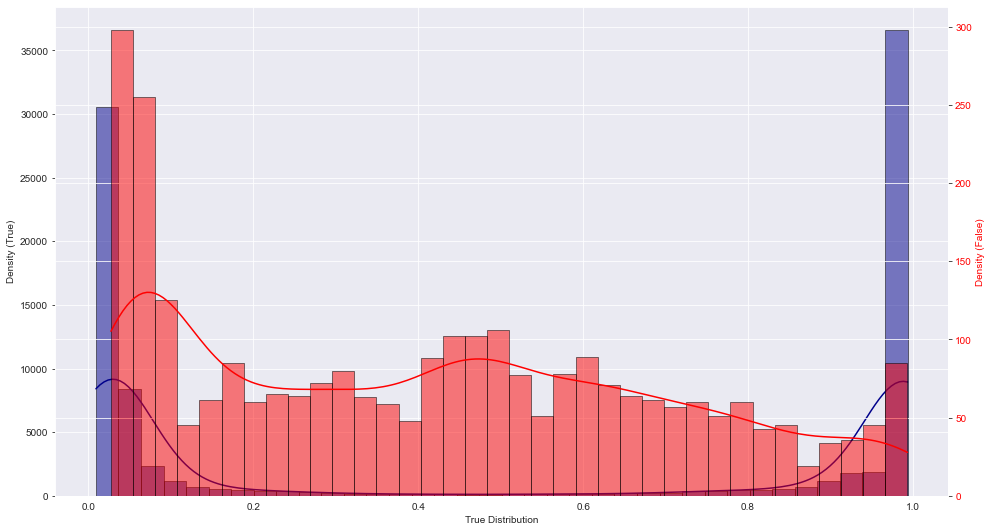

In [ ]:
# plot distribution of falses (red) and trues (blue)

l_true = d_prob_dis["TN"] + d_prob_dis["TP"]
l_false = d_prob_dis["FN"] + d_prob_dis["FP"]

# Create two subplots
fig, ax1 = plt.subplots()

# Plot true values on ax1
sns.histplot(l_true, kde=True, bins=int(180/5), color='darkblue',
             edgecolor='black', linewidth=0.5, ax=ax1)

# Set labels and legend for ax1
ax1.set_xlabel('True Distribution')
ax1.set_ylabel('Density (True)')

# Create a second y-axis for false values
ax2 = ax1.twinx()

# Plot false values on ax2
sns.histplot(l_false, kde=True, bins=int(180/5), color='red',
             edgecolor='black', linewidth=0.5, ax=ax2)

# Set labels and legend for ax2
ax2.set_ylabel('Density (False)', color='red')
for tl in ax2.get_yticklabels():
    tl.set_color('red')

# Show the plot
plt.show()

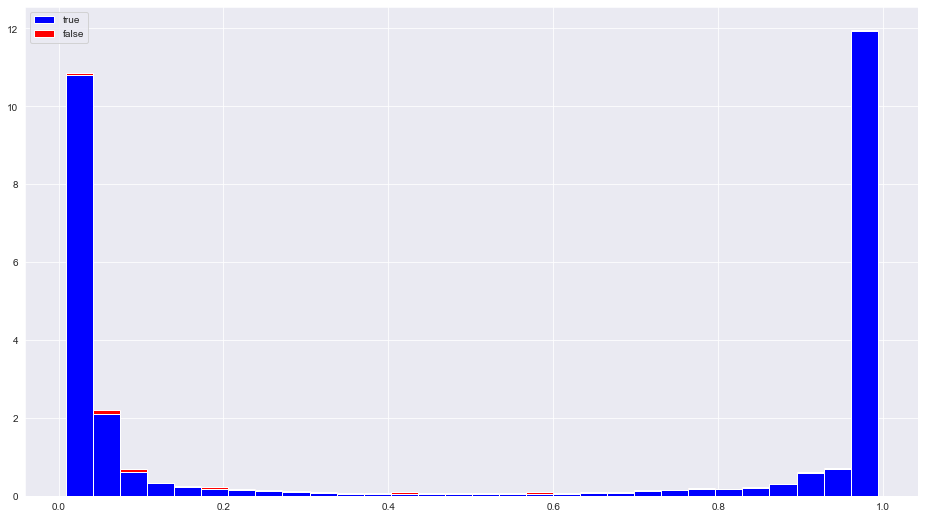

In [ ]:
# stacked probabilities distribution: trues + false


plt.hist([l_true,l_false],
         bins = 30, stacked=True, density=True,
         color = ['b','r'] ,label = ['true','false'])

plt.legend(loc="upper left")

plt.show()

## FEATURES IMPORTANCE

### Shapley's value

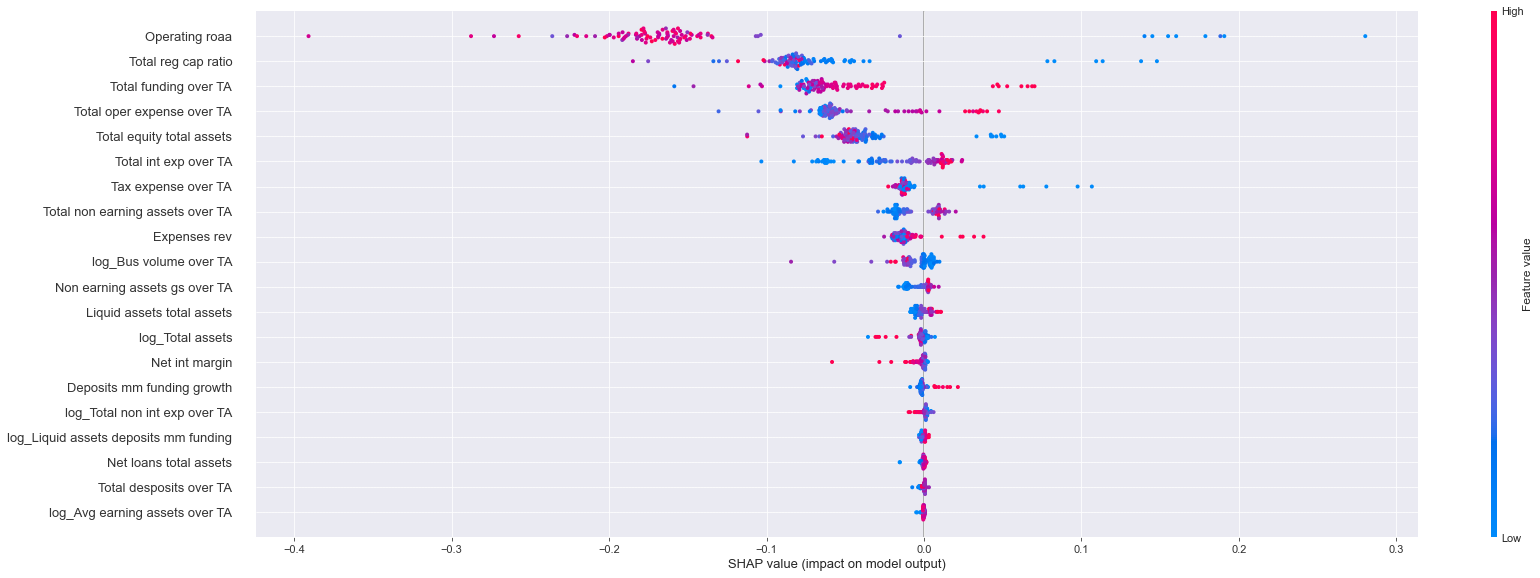

In [ ]:
# shapley value
data = shap.sample(df[l_var], 100)
pred = model.predict(data)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)
np.abs(shap_values[1].sum(1) + explainer.expected_value[1] - pred).max()

shap.summary_plot(shap_values[1], data, show=False)
fig = plt.gcf()
fig.set_figheight(8)
fig.set_figwidth(38)

# plt.savefig(f"shap_{algo}.png")

### Permutation importance

- sklearn version

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# sklearn function
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html


def plot_permutation_importance(clf, X, y, ax, n=10, seed=42, jobs=-1):
    result = permutation_importance(clf, X, y, n_repeats=n, random_state=seed, n_jobs=jobs)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

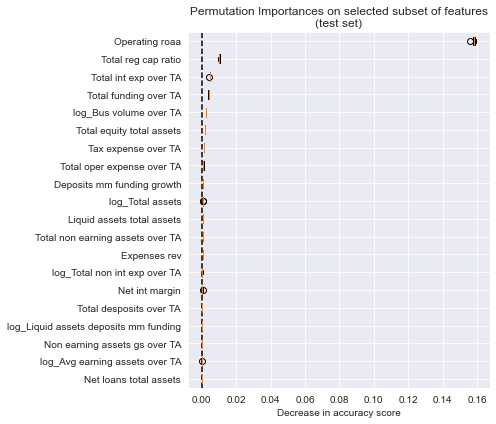

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))

plot_permutation_importance(model, X_train_results, y_train_smote, ax, n=10)
ax.set_title("Permutation Importances on selected subset of features\n(train set)")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

plt.show()

- homemade version

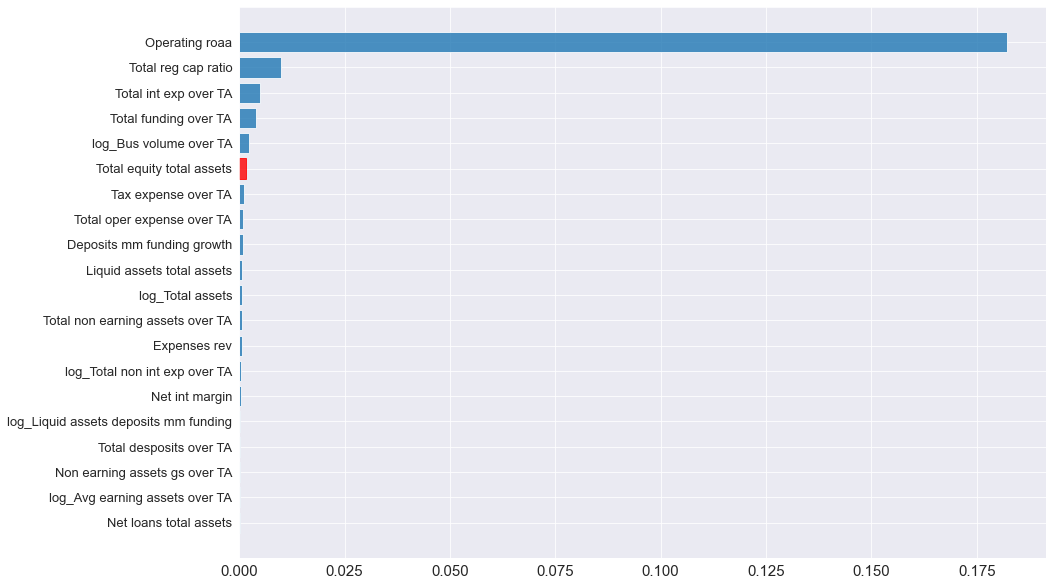

[[0.00011347396962790857, 'Net loans total assets'],
 [0.0001592869090502047, 'log_Avg earning assets over TA'],
 [0.00018087803326394258, 'Non earning assets gs over TA'],
 [0.00023639555873256057, 'Total desposits over TA'],
 [0.00024368903006477538, 'log_Liquid assets deposits mm funding'],
 [0.00036310456469212937, 'Net int margin'],
 [0.00044216379196859723, 'log_Total non int exp over TA'],
 [0.0006378203279959749, 'Expenses rev'],
 [0.0006467507915528525, 'Total non earning assets over TA'],
 [0.0006864979086113054, 'log_Total assets'],
 [0.0007094863729059098, 'Liquid assets total assets'],
 [0.0008769138326156778, 'Deposits mm funding growth'],
 [0.0009695115089849438, 'Total oper expense over TA'],
 [0.001209722033964522, 'Tax expense over TA'],
 [0.001719040030401131, 'Total equity total assets'],
 [0.002351598902866736, 'log_Bus volume over TA'],
 [0.0038724071204265798, 'Total funding over TA'],
 [0.004822611574398894, 'Total int exp over TA'],
 [0.009804884906127076, 'Tot

In [ ]:
# Confusion matrix - accuracy out sample

y_predict_in_smote = model.predict(X_train_smote)

cross_tab_in_smote = pd.crosstab(y_train_smote,y_predict_in_smote).values

a = cross_tab_in_smote[0,0]
b = cross_tab_in_smote[0,1]
c = cross_tab_in_smote[1,0]
d = cross_tab_in_smote[1,1]

precision = d/(d+b)
recall = d/(d+c)

f1 = 2*precision*recall/(precision + recall)

permutation_importance(model,f1,X_train_smote,y_train_smote,l_var,10,"f1",'Total equity total assets')# ,save_path)

## PARTIAL DEPENDENCE PLOT

We plot the partial dependence of default probability computed by the model to our main variable of interest, TE/TA, the capital regulatory ratio and the profitability as measured by ROAA. It might be interesting to look into 2-ways PDPs invloving those variables to see if the effects are cumulated or if a variables' effect over pass those of an other one.

### One-Way PDP

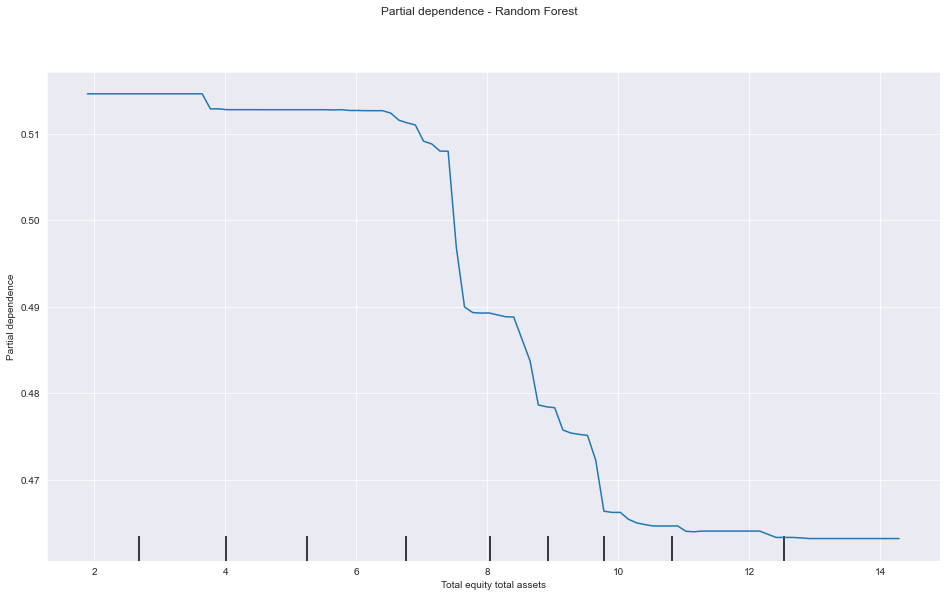

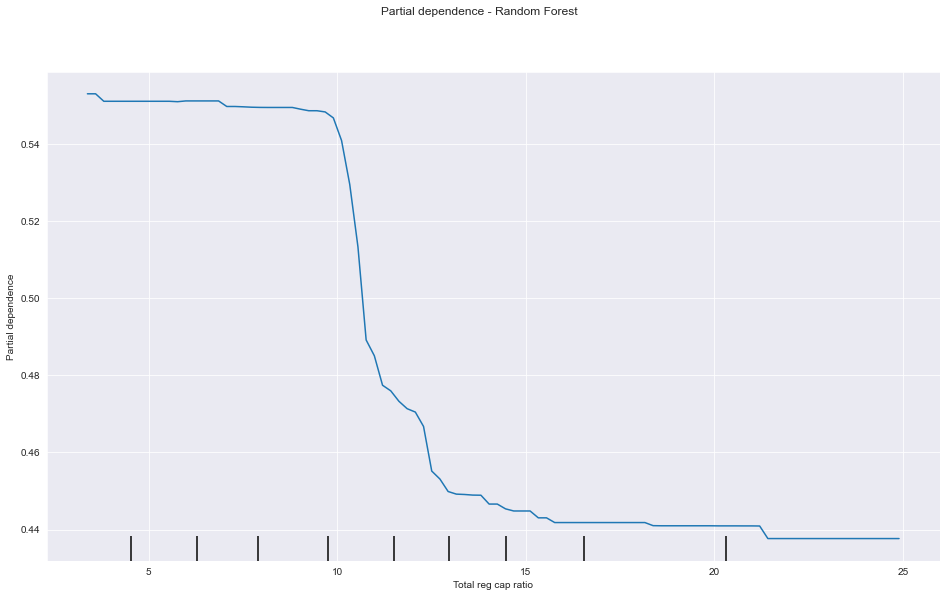

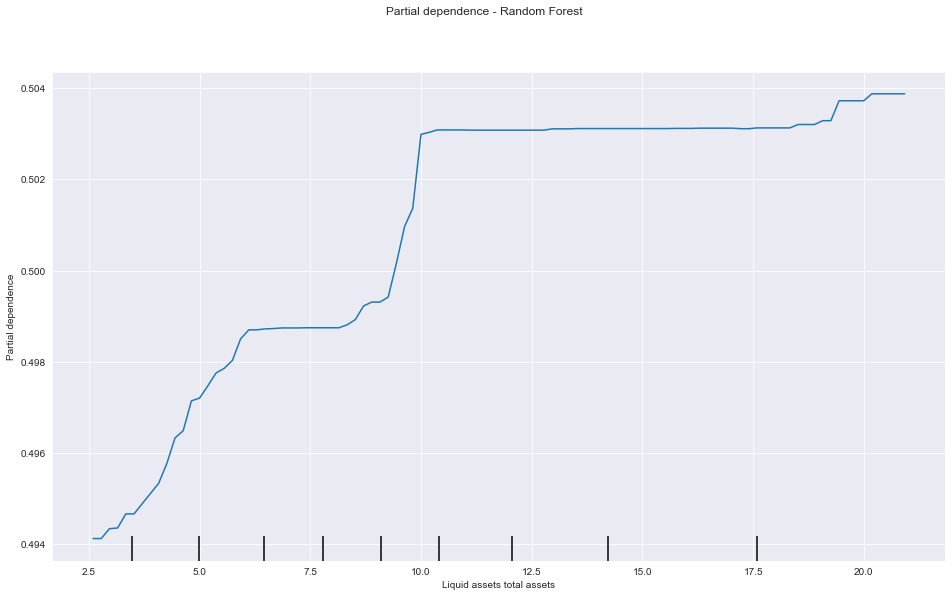

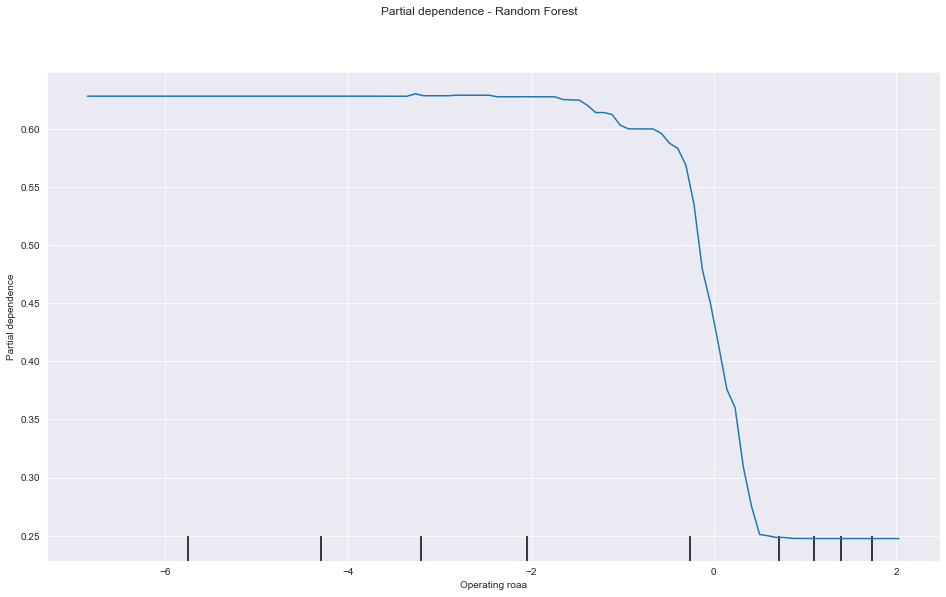

In [ ]:
common_params = {
    "subsample": .9,
    "n_jobs": -1,
    "grid_resolution": 100,
    "random_state": SEED,
}

l_pdp_var = ["lev","cap","liq"]

for i in [0,1,2,8] :
    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train_results,
        features=[i],
        **common_params,
    )

    display.figure_.suptitle(
        "Partial dependence - Random Forest"
    )

    display.figure_.subplots_adjust(hspace=0.3)


In [ ]:
# partial dependence plot - two variables :
    # leverage ratio and total capital ratio
    # mean reunning time: 1h


common_params = {
    "subsample": .9,
    "n_jobs": -1,
    "grid_resolution": 100,
    "random_state": seed,
}

display = PartialDependenceDisplay.from_estimator(
    model,
    X_train_smote,
    features=[(0,1)],
    **common_params,
)


display.figure_.suptitle(
    "Two ways partial dependence"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

In [ ]:
# partial dependence plot - two variables :
    # leverage ratio and liquidity ratio
    # mean reunning time: 1h


common_params = {
    "subsample": .9,
    "n_jobs": -1,
    "grid_resolution": 100,
    "random_state": seed,
}

display = PartialDependenceDisplay.from_estimator(
    model,
    X_train_smote,
    features=[(0,2)],
    **common_params,
)


display.figure_.suptitle(
    "Two ways partial dependence"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

In [ ]:
# partial dependence plot - two variables :
    # total capital ratio and liquidity ratio
    # mean reunning time: 1h


common_params = {
    "subsample": .9,
    "n_jobs": -1,
    "grid_resolution": 100,
    "random_state": seed,
}

display = PartialDependenceDisplay.from_estimator(
    model,
    X_train_smote,
    features=[(1,2)],
    **common_params,
)


display.figure_.suptitle(
    "Two ways partial dependence"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

## ACCUMULATED LOCAL EFFECT

PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


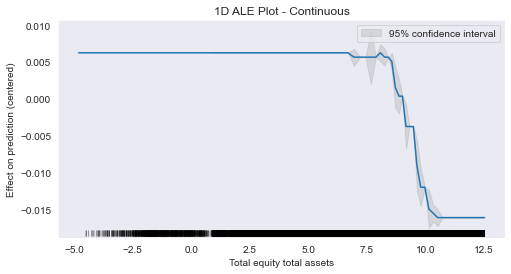

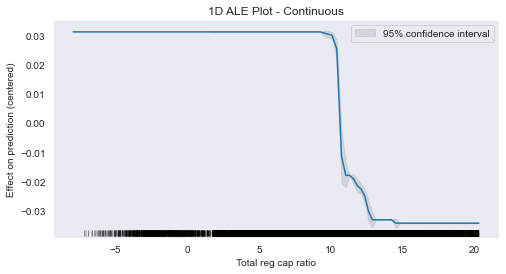

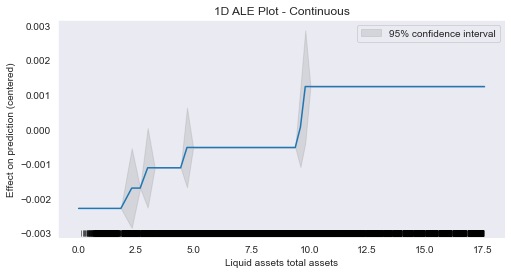

In [ ]:
sns.set_style("dark")

df_ale = pd.DataFrame(data=X_train_results,
           columns=l_var)

n_thresholds = int(0.9*df_ale.shape[0])

ale_features = [l_var[0], l_var[1],l_var[2]]

for var in ale_features:
        #ALE
    upthresholds = sorted([i for i in df_ale[var]])[:n_thresholds][-1]
    downthresholds = sorted([i for i in df_ale[var]])[:n_thresholds][0]

    ale_eff = ale(X=df_ale[(df_ale[var]<upthresholds)&(df_ale[var]>downthresholds)], model=model, feature=[var], grid_size=50, include_CI=True, C=0.95)
